In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = sns.load_dataset('titanic')
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [3]:
cols = ['pclass','sex','age','fare']
df = df[cols + ['survived']].dropna()
df.dtypes

,0
pclass,int64
sex,object
age,float64
fare,float64
survived,int64


In [4]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df

,pclass,sex,age,fare,survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
885,3,1,39.0,29.1250,0
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,1
889,1,0,26.0,30.0000,1


# ENTRENAMIENTO DE MODELO DE REGRESIÓN LOGISTICA

In [5]:
X = df[cols]
y = df['survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy:.2f}')


Accuracy : 0.74


# MATRIZ DE CONFUSIÓN

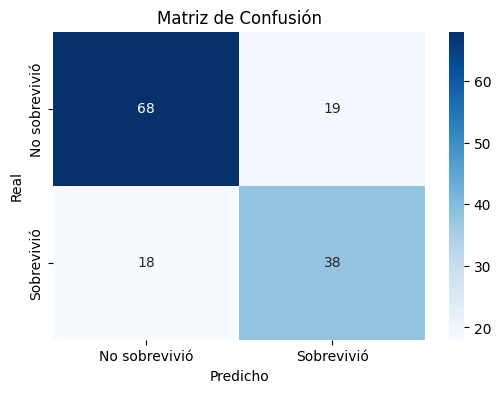

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy:.2f}')

Accuracy : 0.76


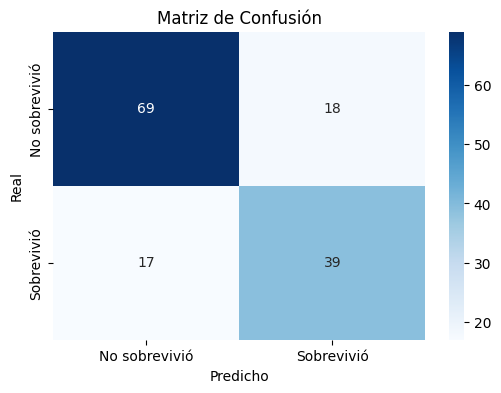

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()